# TECHNICAL ANALYSIS ON STOCK MARKET USING GRADIENT BOOSTING

Technical analysis is used to decide the most important factors that affect the stock and make a buy/sell decision. 

The entire procedure in this notebook consists of the following steps:

- Step 1 - Function to derive technical indicators from fundamental indicators that are useful for analysis
- Step 2 - Function to preprocess data to a format that suits feature selection using xgb regressor
- Step 3 - Function to perform feature engineering and get all features with their importance (weights).<br>    Feature engineering is done using Gradient Boosting.
- Step 4 - Function to select best features for use in modeling using results from step 3 
- Step 5 - Apple the Step 1-4 to each of the stocks in the portfolio

    1. Apple
    2. IBM
    3. Goldman Sachs
    4. Amazon
    5. General Electric
    6. Google <br>
<br>
- Step 6 - Results
<br>
<br>

Note - Run this notebook on Python 2.7 

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
%matplotlib inline 
import xgboost as xgboost

### Step 1 - Function to derive technical indicators from fundamental indicators that are useful for analysis
<br>

In [67]:
def technical_indicators(dataset, rows):
     
    print(dataset.head())
    
    #moving avaerage for 7 days
    dataset['MA7'] = dataset['Close'].rolling(window=7).mean()
    
    #moving avaerage for 21 days
    dataset['MA21'] = dataset['Close'].rolling(window=21).mean() 
    
    #moving avaerage for 20 days
    dataset['MA20'] = dataset['Close'].rolling(window=20).mean() 
    
    #moving avaerage for 60 days
    #dataset['MA50'] = dataset['Close'].rolling(window=50).mean()
    
    #moving avaerage for 60 days
    dataset['MA60'] = dataset['Close'].rolling(window=60).mean()
    
    #moving avaerage for 42 days
    dataset['MA42'] = dataset['Close'].rolling(window=42).mean()  
    
    #moving avaerage for 63 days
    dataset['MA63'] = dataset['Close'].rolling(window=63).mean()  
    
    #moving avaerage for 60 days
    #dataset['MA200'] = dataset['Close'].rolling(window=200).mean()
    
    #Deleting all the rows of year 2012
    stock_dataset = dataset.drop(dataset.index[:rows]).copy()
    print("\nAfter removing 2012\n")
    print(stock_dataset.head())
    
    # Create MACD
    
    #Moving Average Convergence Divergence (12EMA - 26EMA)
    stock_dataset['26EMA'] = pd.ewma(stock_dataset['Close'], span=26)
    stock_dataset['12EMA'] = pd.ewma(stock_dataset['Close'], span=12)
    stock_dataset['MACD'] = (stock_dataset['12EMA']- stock_dataset['26EMA'])
    
    #Exponential Moving Average 
    stock_dataset['EMA'] = stock_dataset['Close'].ewm(com=0.5).mean()
    #stock_dataset['1EMA'] = pd.ewma(stock_dataset['Close'], span=1)
    stock_dataset.head()
    
    return stock_dataset

### Step 2 - Function to preprocess data to a format that suits feature selection using xgb regressor
<br>

In [68]:
def get_feature_importance_data(data_income):
    
    data = data_income.copy()
    y = data['Close'][1:]
    
    #All columns from Volume 
    X = data.iloc[0:-1, 6:]
    
    train_samples = int(X.shape[0] * 0.75)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

### Step 3 - Function to perform feature engineering and get all features with their importance (weights)
<br>

In [70]:
def perform_feature_selection(X_train_FI, y_train_FI, X_test_FI, y_test_FI,stock_dataset,filename):
    
    regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
    xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                             eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                             verbose=False)
    fig = plt.figure(figsize=(8,8))
    plt.xticks(rotation='vertical')
    plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
    plt.title('Feature importance of the technical indicators.')
    plt.show()
    
    return xgbModel

In [ ]:
def technical_analysis(symbol):
    
    dataset = pd.read_csv("/Users/aishwaryagunashekar/Desktop/Stock_Market_Project/Data/" + str(symbol) + "_technical.csv")
    stock_dataset = technical_indicators(dataset, 146)
    filename = "/Users/aishwaryagunashekar/Desktop/Stock_Market_Project/Data/" + str(symbol) + "_indicators.csv"

    (X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(stock_dataset)
    xgbModel = perform_feature_selection(X_train_FI, y_train_FI, X_test_FI, y_test_FI,stock_dataset, filename)
    
    return stock_dataset
    

### Step 4 - Function to select best features for modeling using results from step 3 
<br>

In [ ]:
def select_best_features_for_ML(stock_dataset, symbol, features_to_drop):
    
    filename = "/Users/aishwaryagunashekar/Desktop/Stock_Market_Project/Data/" + str(symbol) + "_indicators.csv"
    stock_dataset = stock_dataset.drop(features_to_drop, axis=1)
    stock_dataset.to_csv(filename ,index=False)
    dataset = pd.read_csv(filename)
    print(dataset.head())
    print(dataset.shape)

### Step 5 - Apply the Step 1-4 to each of the stocks in the portfolio


### 1. APPLE


After removing 2012

           Date       Open       High        Low      Close  Adj Close  \
146  2013-01-02  79.117142  79.285713  77.375717  78.432854  55.923737   
147  2013-01-03  78.268570  78.524284  77.285713  77.442856  55.217865   
148  2013-01-04  76.709999  76.947144  75.118568  75.285713  53.679771   
149  2013-01-07  74.571426  75.614288  73.599998  74.842857  53.364014   
150  2013-01-08  75.601425  75.984283  74.464287  75.044289  53.507637   

        Volume        MA7       MA21       MA20       MA60       MA42  \
146  140129500  74.660203  76.123333  75.742428  81.852952  78.372075   
147   88241300  75.124897  75.823401  75.501356  81.556047  78.186905   
148  148583400  75.264284  75.491088  75.417142  81.257024  78.017517   
149  121039100  75.486734  75.389795  75.250428  80.984952  77.810986   
150  114676800  75.695917  75.240612  75.193714  80.721762  77.615272   

          MA63  
146  82.472539  
147  82.206576  
148  81.902018  
149  81.567437  
150  81.2

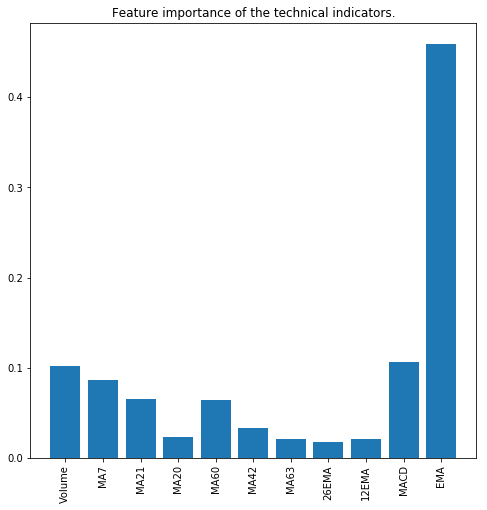

In [71]:
symbol = 'AAPL'
stock_dataset = technical_analysis(symbol)

In [64]:
features_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'MA20', 'MA42', 'MA63', '26EMA', '12EMA']
select_best_features_for_ML(stock_dataset, symbol, features_to_drop)

         Date      Close     Volume        MA7       MA21       MA60  \
0  2013-01-02  78.432854  140129500  74.660203  76.123333  81.852952   
1  2013-01-03  77.442856   88241300  75.124897  75.823401  81.556047   
2  2013-01-04  75.285713  148583400  75.264284  75.491088  81.257024   
3  2013-01-07  74.842857  121039100  75.486734  75.389795  80.984952   
4  2013-01-08  75.044289  114676800  75.695917  75.240612  80.721762   

       MACD        EMA  
0  0.000000  78.432854  
1 -0.022211  77.690356  
2 -0.095195  76.025603  
3 -0.142045  75.227249  
4 -0.156497  75.104772  


(1510, 8)


### 2. IBM


After removing 2012

           Date        Open        High         Low       Close   Adj Close  \
146  2013-01-02  194.089996  196.350006  193.800003  196.350006  156.970551   
147  2013-01-03  195.669998  196.289993  194.440002  195.270004  156.107132   
148  2013-01-04  194.190002  194.460007  192.779999  193.990005  155.083878   
149  2013-01-07  193.399994  193.779999  192.339996  193.139999  154.404358   
150  2013-01-08  192.919998  193.300003  191.600006  192.869995  154.188507   

      Volume         MA7        MA21        MA20        MA60        MA42  \
146  4234100  192.601430  192.382380  192.527499  194.507167  191.609762   
147  3644700  192.865716  192.658095  192.823000  194.255167  191.565000   
148  3380200  193.092861  192.878571  193.090000  193.978501  191.578334   
149  2862300  193.262861  193.092381  193.262000  193.700500  191.554524   
150  3026900  193.285716  193.243333  193.308000  193.448500  191.502143   

           MA63  
146  195.257937  
147  195.0

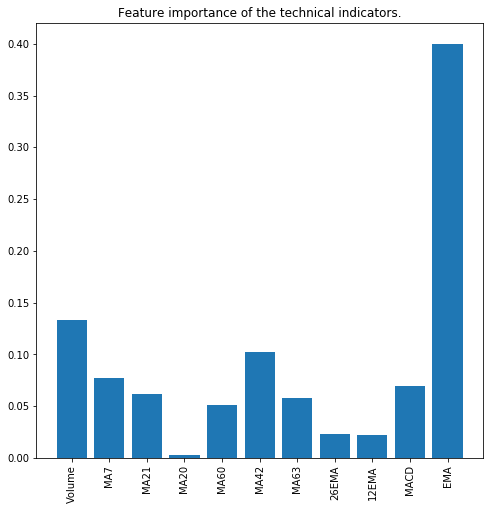

In [54]:
symbol = 'IBM'
stock_dataset = technical_analysis(symbol)

In [55]:
features_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'MA20', 'MA42', 'MA63', '26EMA', '12EMA']
select_best_features_for_ML(stock_dataset, symbol, features_to_drop)

         Date       Close   Volume         MA7        MA21        MA42  \
0  2013-01-02  196.350006  4234100  192.601430  192.382380  191.609762   
1  2013-01-03  195.270004  3644700  192.865716  192.658095  191.565000   
2  2013-01-04  193.990005  3380200  193.092861  192.878571  191.578334   
3  2013-01-07  193.139999  2862300  193.262861  193.092381  191.554524   
4  2013-01-08  192.869995  3026900  193.285716  193.243333  191.502143   

       MACD         EMA  
0  0.000000  196.350006  
1 -0.024231  195.540005  
2 -0.070568  194.466928  
3 -0.120602  193.571251  
4 -0.155995  193.101815  


(1510, 8)


### 3. GOLDMAN SACHS


After adding derived attributes

           Date        Open        High         Low       Close   Adj Close  \
146  2013-01-02  131.300003  131.660004  129.619995  131.660004  121.429962   
147  2013-01-03  131.699997  131.779999  130.070007  130.940002  120.765923   
148  2013-01-04  130.929993  134.639999  130.320007  134.509995  124.058540   
149  2013-01-07  134.119995  134.509995  132.880005  134.259995  123.827942   
150  2013-01-08  133.710007  133.949997  132.699997  133.050003  122.711983   

      Volume         MA7        MA21     MA20        MA60        MA42  \
146  4449000  127.792858  122.880000  123.104  121.036833  120.884286   
147  4584600  128.150001  123.477143  123.822  121.220833  121.029286   
148  5234600  129.145714  124.330952  124.691  121.474167  121.297381   
149  3556900  130.159998  125.146666  125.544  121.720833  121.539762   
150  2760200  131.071428  125.901428  126.368  121.944500  121.701667   

           MA63  
146  120.860794  
147  121.084286 

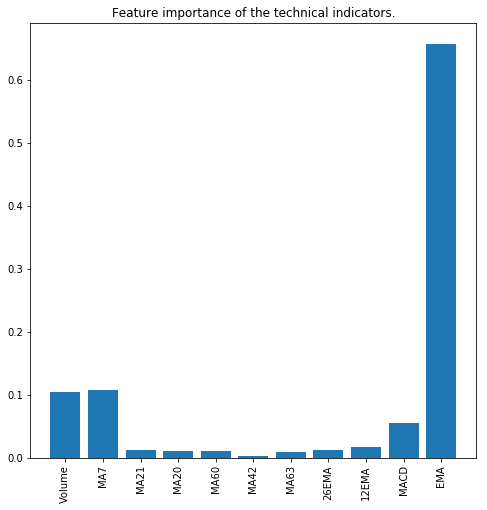

In [75]:
symbol = 'GS'
stock_dataset = technical_analysis(symbol)

In [76]:
features_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'MA20', 'MA42', 'MA63', '26EMA', '12EMA']
select_best_features_for_ML(stock_dataset, symbol, features_to_drop)

         Date       Close   Volume         MA7        MA21        MA60  \
0  2013-01-02  131.660004  4449000  127.792858  122.880000  121.036833   
1  2013-01-03  130.940002  4584600  128.150001  123.477143  121.220833   
2  2013-01-04  134.509995  5234600  129.145714  124.330952  121.474167   
3  2013-01-07  134.259995  3556900  130.159998  125.146666  121.720833   
4  2013-01-08  133.050003  2760200  131.071428  125.901428  121.944500   

       MACD         EMA  
0  0.000000  131.660004  
1 -0.016154  131.120002  
2  0.090122  133.466920  
3  0.127224  134.002246  
4  0.096557  133.364794  


(1510, 8)


### 4. AMAZON


After removing 2012

           Date        Open        High         Low       Close   Adj Close  \
146  2013-01-02  256.079987  258.100006  253.259995  257.309998  257.309998   
147  2013-01-03  257.269989  260.880005  256.369995  258.480011  258.480011   
148  2013-01-04  257.579987  259.799988  256.649994  259.149994  259.149994   
149  2013-01-07  262.970001  269.730011  262.670013  268.459991  268.459991   
150  2013-01-08  267.070007  268.980011  263.570007  266.380005  266.380005   

      Volume         MA7        MA21        MA20        MA60        MA42  \
146  3271000  252.262857  253.031905  253.167000  243.470001  243.727143   
147  2750900  252.485714  253.420000  253.466500  243.436834  244.354286   
148  1874200  252.561428  253.737143  253.725999  243.447501  244.990715   
149  4910000  255.394283  254.427618  254.480499  243.604167  245.803333   
150  3010700  257.975712  255.047142  255.135999  243.861167  246.489524   

           MA63  
146  243.916350  
147  244.0

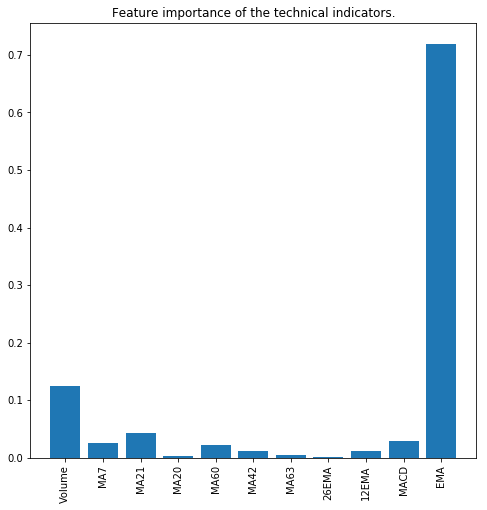

In [78]:
symbol = 'AMZN'
stock_dataset = technical_analysis(symbol)

In [79]:
features_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'MA20', 'MA42', 'MA63', '26EMA', '12EMA']
select_best_features_for_ML(stock_dataset, symbol,features_to_drop)

         Date       Close   Volume         MA7        MA21        MA60  \
0  2013-01-02  257.309998  3271000  252.262857  253.031905  243.470001   
1  2013-01-03  258.480011  2750900  252.485714  253.420000  243.436834   
2  2013-01-04  259.149994  1874200  252.561428  253.737143  243.447501   
3  2013-01-07  268.459991  4910000  255.394283  254.427618  243.604167   
4  2013-01-08  266.380005  3010700  257.975712  255.047142  243.861167   

       MACD         EMA  
0  0.000000  257.309998  
1  0.026250  258.187508  
2  0.054224  258.853844  
3  0.401752  265.337993  
4  0.499369  266.035538  


(1510, 8)


### 5. GENERAL ELECTRIC


After removing 2012

           Date       Open       High        Low      Close  Adj Close  \
146  2013-01-02  21.510000  21.540001  21.200001  21.340000  17.340845   
147  2013-01-03  21.480000  21.490000  21.049999  21.100000  17.145823   
148  2013-01-04  21.209999  21.260000  21.120001  21.200001  17.227083   
149  2013-01-07  21.160000  21.219999  20.959999  21.129999  17.170198   
150  2013-01-08  21.100000  21.120001  20.680000  20.900000  16.983301   

       Volume        MA7       MA21     MA20       MA60       MA42       MA63  
146  46089500  20.847143  21.203334  21.2225  21.396500  21.049048  21.465079  
147  48509100  20.878572  21.216667  21.2345  21.365667  21.043333  21.437937  
148  29802600  20.932858  21.232857  21.2330  21.333667  21.040714  21.412698  
149  32746700  20.984286  21.228095  21.2210  21.303833  21.034048  21.384444  
150  40045500  21.014286  21.205714  21.1930  21.275167  21.017619  21.351905  


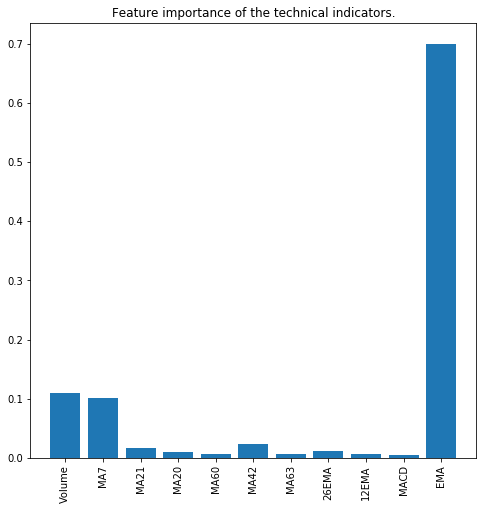

In [81]:
symbol = 'GE'
stock_dataset = technical_analysis(symbol)

In [82]:
features_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'MA20', 'MA42', 'MA63', '26EMA', '12EMA']
select_best_features_for_ML(stock_dataset, symbol, features_to_drop)

         Date      Close    Volume        MA7       MA21       MA42      MACD  \
0  2013-01-02  21.340000  46089500  20.847143  21.203334  21.049048  0.000000   
1  2013-01-03  21.100000  48509100  20.878572  21.216667  21.043333 -0.005385   
2  2013-01-04  21.200001  29802600  20.932858  21.232857  21.040714 -0.003760   
3  2013-01-07  21.129999  32746700  20.984286  21.228095  21.034048 -0.005456   
4  2013-01-08  20.900000  40045500  21.014286  21.205714  21.017619 -0.015415   

         EMA  
0  21.340000  
1  21.160000  
2  21.187693  
3  21.148750  
4  20.982231  


(1510, 8)


### 6. GOOGLE


After removing 2012

           Date        Open        High         Low       Close   Adj Close  \
146  2013-01-02  357.385559  361.151062  355.959839  359.288177  359.288177   
147  2013-01-03  360.122742  363.600128  358.031342  359.496826  359.496826   
148  2013-01-04  362.313507  368.339294  361.488861  366.600616  366.600616   
149  2013-01-07  365.348755  367.301056  362.929504  365.001007  365.001007   
150  2013-01-08  365.393463  365.771027  359.874359  364.280701  364.280701   

      Volume         MA7        MA21        MA20        MA60        MA42  \
146  5115500  352.771990  349.848621  350.072121  346.310086  341.370073   
147  4666500  353.342564  350.520916  350.882848  345.942642  341.796821   
148  5562800  355.362993  351.631313  352.128496  345.696907  342.388804   
149  3332900  357.199615  352.741472  353.211948  345.505734  343.001367   
150  3373900  359.116433  353.739031  354.431267  345.416398  343.611447   

           MA63  
146  347.807450  
147  347.5

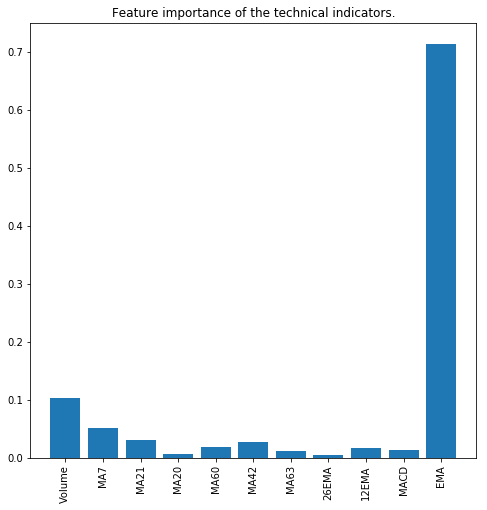

In [84]:
symbol = 'GOOG'
stock_dataset = technical_analysis(symbol)

In [85]:
features_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'MA20', 'MA42', 'MA63', '26EMA', '12EMA']
select_best_features_for_ML(stock_dataset, symbol, features_to_drop)

         Date       Close   Volume         MA7        MA21        MA60  \
0  2013-01-02  359.288177  5115500  352.771990  349.848621  346.310086   
1  2013-01-03  359.496826  4666500  353.342564  350.520916  345.942642   
2  2013-01-04  366.600616  5562800  355.362993  351.631313  345.696907   
3  2013-01-07  365.001007  3332900  357.199615  352.741472  345.505734   
4  2013-01-08  364.280701  3373900  359.116433  353.739031  345.416398   

         MA42         EMA  
0  341.370073  359.288177  
1  341.796821  359.444664  
2  342.388804  364.398785  
3  343.001367  364.805285  
4  343.611447  364.454117  


(1510, 8)

### Step 6 - Results

We have chosen the most impactful features for each of the stocks using <b>Gradient Boosting</b>, filtered out those particular columns from the dataset and stored them for use in predictive modeling. 